In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
with open('../data/processed/puisi.txt', 'r', encoding="utf8") as f:
    text = f.read()

print(text)

1. Aku.
Kalau sampai waktuku
‘Ku mau tak seorang ‘kan merayu
Tidak juga kau
Tak perlu sedu sedan itu
Aku ini binatang jalang
Dari kumpulannya terbuang
Biar peluru menembus kulitku
Aku tetap meradang menerjang
Luka dan bisa kubawa berlari
Berlari
Hingga hilang pedih peri
Dan aku akan lebih tidak peduli
Aku mau hidup seribu tahun lagi.

2. Sia-Sia.
Penghabisan kali itu kau datang
Membawaku karangan kembang
Mawar merah dan melati putih:
Darah dan suci
Kau tebarkan depanku
Serta pandang yang memastikan: Untukmu.
Sudah itu kita sama termangu
Saling bertanya: Apakah ini?
Cinta? Keduanya tak mengerti.
Sehari itu kita bersama. Tak hampir-menghampiri.
Ah! Hatiku yang tak mau memberi
Mampus kau dikoyak-koyak sepi.

3. Sendiri.
Hidupnya tambah sepi, tambah hampa
Malam apa lagi
Ia memekik ngeri
Dicekik kesunyian kamarnya
Ia membenci. Dirinya dari segala
Yang minta perempuan untuk kawannya
Bahaya dari tiap sudut. Mendekat juga
Dalam ketakutan-menanti ia menyebut satu nama
Terkejut ia terduduk. Siap

In [4]:
len(text)

92518

In [5]:
# The unique characters in the file
vocab = sorted(set(text))

print(f'{len(vocab)} unique characters')
print('vocab:', vocab)

83 unique characters
vocab: ['\n', ' ', '!', '%', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x81', '\xad', '®', 'é', '–', '—', '‘', '“', '”', '„', '…']


In [6]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}

char2index

{'\n': 0,
 ' ': 1,
 '!': 2,
 '%': 3,
 '(': 4,
 ')': 5,
 '*': 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '0': 10,
 '1': 11,
 '2': 12,
 '3': 13,
 '4': 14,
 '5': 15,
 '6': 16,
 '7': 17,
 '8': 18,
 '9': 19,
 ':': 20,
 ';': 21,
 '?': 22,
 'A': 23,
 'B': 24,
 'C': 25,
 'D': 26,
 'E': 27,
 'F': 28,
 'G': 29,
 'H': 30,
 'I': 31,
 'J': 32,
 'K': 33,
 'L': 34,
 'M': 35,
 'N': 36,
 'O': 37,
 'P': 38,
 'R': 39,
 'S': 40,
 'T': 41,
 'U': 42,
 'V': 43,
 'W': 44,
 'Y': 45,
 'Z': 46,
 'a': 47,
 'b': 48,
 'c': 49,
 'd': 50,
 'e': 51,
 'f': 52,
 'g': 53,
 'h': 54,
 'i': 55,
 'j': 56,
 'k': 57,
 'l': 58,
 'm': 59,
 'n': 60,
 'o': 61,
 'p': 62,
 'r': 63,
 's': 64,
 't': 65,
 'u': 66,
 'v': 67,
 'w': 68,
 'x': 69,
 'y': 70,
 'z': 71,
 '\x81': 72,
 '\xad': 73,
 '®': 74,
 'é': 75,
 '–': 76,
 '—': 77,
 '‘': 78,
 '“': 79,
 '”': 80,
 '„': 81,
 '…': 82}

In [7]:
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '%' '(' ')' '*' ',' '-' '.' '0' '1' '2' '3' '4' '5' '6' '7'
 '8' '9' ':' ';' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M'
 'N' 'O' 'P' 'R' 'S' 'T' 'U' 'V' 'W' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g'
 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'
 '\x81' '\xad' '®' 'é' '–' '—' '‘' '“' '”' '„' '…']


In [8]:
text_as_int = np.array([char2index[char] for char in text])

print(f'text_as_int length: {len(text_as_int)}')
print(f'{repr(text[:15])} --> {text_as_int[:15]}')

text_as_int length: 92518
'1. Aku.\nKalau s' --> [11  9  1 23 57 66  9  0 33 47 58 47 66  1 64]


In [9]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 916


In [10]:
print(text_as_int)
text_as_int.shape

[11  9  1 ... 59 66  0]


(92518,)

In [11]:
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [12]:
# Generate batched sequences out of the char_dataset.
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

# Sequences examples.
for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 916

'1. Aku.\nKalau sampai waktuku\n‘Ku mau tak seorang ‘kan merayu\nTidak juga kau\nTak perlu sedu sedan itu\n'
'Aku ini binatang jalang\nDari kumpulannya terbuang\nBiar peluru menembus kulitku\nAku tetap meradang men'
'erjang\nLuka dan bisa kubawa berlari\nBerlari\nHingga hilang pedih peri\nDan aku akan lebih tidak peduli\n'
'Aku mau hidup seribu tahun lagi.\n\n2. Sia-Sia.\nPenghabisan kali itu kau datang\nMembawaku karangan kemb'
'ang\nMawar merah dan melati putih:\nDarah dan suci\nKau tebarkan depanku\nSerta pandang yang memastikan: '


In [13]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [14]:
dataset = sequences.map(split_input_target)

# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 916


In [15]:
for input_example, target_example in dataset.take(3):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: '1. Aku.\nKalau sampai waktuku\n‘Ku mau tak seorang ‘kan merayu\nTidak juga kau\nTak perlu sedu sedan itu'
Target: '. Aku.\nKalau sampai waktuku\n‘Ku mau tak seorang ‘kan merayu\nTidak juga kau\nTak perlu sedu sedan itu\n'
Input sequence size: 100
Target sequence size: 100

Input: 'Aku ini binatang jalang\nDari kumpulannya terbuang\nBiar peluru menembus kulitku\nAku tetap meradang me'
Target: 'ku ini binatang jalang\nDari kumpulannya terbuang\nBiar peluru menembus kulitku\nAku tetap meradang men'
Input sequence size: 100
Target sequence size: 100

Input: 'erjang\nLuka dan bisa kubawa berlari\nBerlari\nHingga hilang pedih peri\nDan aku akan lebih tidak peduli'
Target: 'rjang\nLuka dan bisa kubawa berlari\nBerlari\nHingga hilang pedih peri\nDan aku akan lebih tidak peduli\n'


In [16]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))

Step  0
  input: 51 ('e')
  expected output: 63 ('r')
Step  1
  input: 63 ('r')
  expected output: 56 ('j')
Step  2
  input: 56 ('j')
  expected output: 47 ('a')
Step  3
  input: 47 ('a')
  expected output: 60 ('n')
Step  4
  input: 60 ('n')
  expected output: 53 ('g')


In [17]:
# Batch size.
BATCH_SIZE = 8

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<_BatchDataset element_spec=(TensorSpec(shape=(8, 100), dtype=tf.int32, name=None), TensorSpec(shape=(8, 100), dtype=tf.int32, name=None))>

In [18]:
print('Batched dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

Batched dataset size: 114


In [20]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[57 66  7  0 48 47 54 68 47  1 64 51 64 66 60 53 53 66 54 60 70 47  1 55
  60 55  1 54 47 60 70 47  1 65 55 65 55 62 47 60  7  0 48 47 54 68 47  1
  59 61 48 55 58 57 66  1 54 47 60 70 47  1 65 55 65 55 62 47 60  1 36 70
  47  7  0 48 47 54 68 47  1 63 66 59 47 54 57 66  1 54 47 60 70 47  1 65
  55 65 55 62]
 [57  1 57 51 47 60 53 53 66 60 47 60  1 50 47 60  1 57 51 58 66 68 51 64
  47 60 59 66  0 57 47 59 66  1 65 47 57 66 65  1 57 51 62 47 50 47  1 50
  66 60 55 47  0  0 32 66 68 55 65 47 57 66  0 34 51 62 47 64  1 50 47 63
  55  1 57 61 65 47 57  8 57 61 65 47 57  1 47 60 47 58 55 64 47  0 49 55
  60 65 47 57]
 [ 0 42 50 47 63 47  1 62 51 60 66 54  1 47 64 47 62  1 49 47 60 50 66  9
   0 41 47 57  1 47 50 47  1 70 47 60 53  1 56 51 58 47 64  1 50 55  1 50
  47 58 47 59  1 57 51 54 55 50 66 62 47 60  9  0 38 51 63 55 64 65 55 68
  47  1 59 51 58 47 70 47 60 53  8 58 47 70 47 60 53  1 48 47 53 47 55 57
  47 60  1 48]
 [62 51 63 65 47 60 70 47 47 60 5

In [21]:
print(repr("".join(index2char[input_text][0])))
print(repr("".join(index2char[target_text][0])))

'ku,\nbahwa sesungguhnya ini hanya titipan,\nbahwa mobilku hanya titipan Nya,\nbahwa rumahku hanya titip'
'u,\nbahwa sesungguhnya ini hanya titipan,\nbahwa mobilku hanya titipan Nya,\nbahwa rumahku hanya titipa'


In [22]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 100

# Number of RNN units.
lstm_units = 256

In [23]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [24]:
model = build_model(vocab_size, embedding_dim, lstm_units, BATCH_SIZE)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (8, None, 100)            8300      
                                                                 
 lstm (LSTM)                 (8, None, 256)            365568    
                                                                 
 dense (Dense)               (8, None, 83)             21331     
                                                                 
Total params: 395,199
Trainable params: 395,199
Non-trainable params: 0
_________________________________________________________________


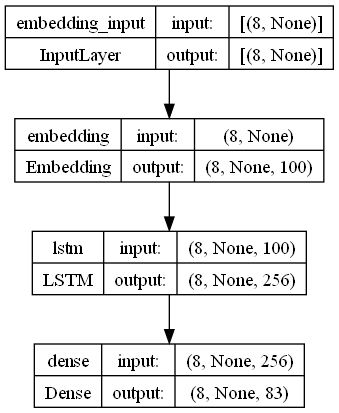

In [26]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [27]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(8, 100, 83) # (batch_size, sequence_length, vocab_size)


In [28]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[-0.00162815 -0.00109532  0.0032778  -0.00138191  0.00287016 -0.00745593
 -0.00798234  0.00456777 -0.00294606 -0.00122544 -0.00581576  0.00996375
  0.00166561  0.00630679  0.00622912 -0.00371815  0.00379352 -0.00093322
  0.00521367  0.0020107  -0.00169146 -0.00361738 -0.00270079 -0.00560946
  0.00056896 -0.00909316  0.00147143  0.00010573  0.00101255  0.00244775
  0.00806486  0.00024688  0.00485123  0.00127208  0.00610267 -0.00037083
  0.00129143  0.00250835 -0.01051902 -0.00401395 -0.00095379 -0.00050657
 -0.00323565 -0.00225494 -0.00114587  0.00396355  0.00239493 -0.00571067
 -0.00128431 -0.00418011  0.00373653 -0.00402618  0.00859698 -0.00433116
  0.00362655 -0.00550858  0.00033085  0.00138055 -0.00212568 -0.00252899
 -0.00477809  0.00799696 -0.0018298   0.00041879 -0.00114038 -0.00679107
 -0.00207743  0.0029094  -0.00394127 -0.0024366   0.00057686  0.00211031
 -0.00019856  0.00276632  0.00053307 -0.00091792  0.0018

In [29]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

In [30]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

In [31]:
sampled_indices

array([27, 18, 50, 11, 48, 45, 13,  2, 70, 20, 68, 16, 82, 63, 37, 73,  2,
       13, 28, 49,  4, 49, 58, 16, 49,  0, 64, 14,  4, 45, 35,  9,  4, 48,
       32, 82,  1, 31, 57, 68, 32, 37, 41,  2, 12, 38,  2, 18,  3, 52, 78,
       35, 31, 13, 69, 65, 53, 50, 14, 74, 31, 11, 13, 34, 63,  7, 60, 75,
       21, 64, 55, 48, 57, 20, 10,  8, 42, 18, 57, 21, 53, 33, 28, 69, 45,
       50, 48, 21, 76, 35, 12, 43, 11, 34,  4, 27, 10, 30, 64, 55],
      dtype=int64)

In [32]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 'atakan setuju dan tidak setuju.\n\nKenapa ketakutan menjadi tabir pikiran ?\nKekhawatiran telah mencema'

Next char prediction:
 'E8d1bY3!y:w6…rO\xad!3Fc(cl6c\ns4(YM.(bJ… IkwJOT!2P!8%f‘MI3xtgd4®I13Lr,né;sibk:0-U8k;gKFxYdb;–M2V1L(E0Hsi'


In [33]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 47 ('a')
  next predicted: 53 ('E')
Prediction  1
  input: 65 ('t')
  next predicted: 53 ('8')
Prediction  2
  input: 47 ('a')
  next predicted: 53 ('d')
Prediction  3
  input: 57 ('k')
  next predicted: 53 ('1')
Prediction  4
  input: 47 ('a')
  next predicted: 53 ('b')


In [34]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (8, 100, 83)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4202843


In [35]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [36]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [37]:
EPOCHS=40

In [38]:
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/40


114/114 [==============================] - 34s 256ms/step - loss: 2.9624
Epoch 2/40
114/114 [==============================] - 27s 238ms/step - loss: 2.3112
Epoch 3/40
114/114 [==============================] - 32s 275ms/step - loss: 2.1741
Epoch 4/40
114/114 [==============================] - 31s 269ms/step - loss: 2.1162
Epoch 5/40
114/114 [==============================] - 31s 268ms/step - loss: 2.0686
Epoch 6/40
114/114 [==============================] - 31s 266ms/step - loss: 2.0225
Epoch 7/40
114/114 [==============================] - 31s 271ms/step - loss: 1.9859
Epoch 8/40
114/114 [==============================] - 32s 276ms/step - loss: 1.9490
Epoch 9/40
114/114 [==============================] - 31s 272ms/step - loss: 1.9157
Epoch 10/40
114/114 [==============================] - 32s 281ms/step - loss: 1.8828
Epoch 11/40
114/114 [==============================] - 31s 271ms/step - loss: 1.8526
Epoch 12/40
114/114 [==============================] - 31s 271ms/step - loss: 1.8251


In [39]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

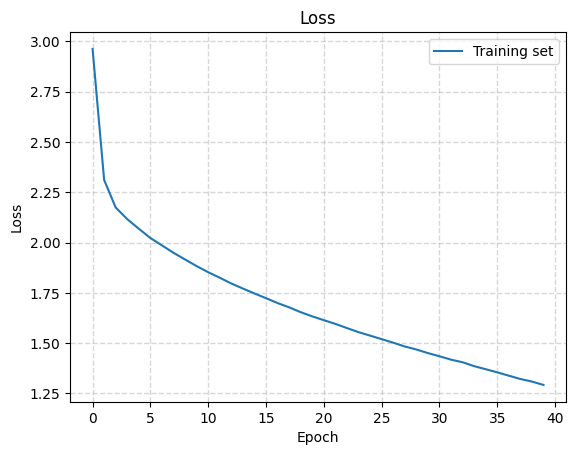

In [40]:
render_training_history(history)

In [41]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints\\ckpt_40'

In [42]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, lstm_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 100)            8300      
                                                                 
 lstm_1 (LSTM)               (1, None, 256)            365568    
                                                                 
 dense_1 (Dense)             (1, None, 83)             21331     
                                                                 
Total params: 395,199
Trainable params: 395,199
Non-trainable params: 0
_________________________________________________________________


In [44]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [45]:
# Generate the text with default temperature (1.0).
print(generate_text(model, start_string=u"minum"))

minumul aku terbentukan ada resja,
sepektlah di atas menjolman?
Aku berderap.
Penitmu gurus terisnya.
Peretapeprang rekok pembangungan.

bilam tanpa sama.
Ya, Tagai rujak kampurg batu,
yang cupuh mengegar-gengingan,
yang carang menggangucan.
dan aku berkatanya yang belasar napas.
Membelai lepak pasa
dengan palang.
Tetapi. tetapi lagi selah mukasia.
Bumi kurahnya yang persa,
Tahu, menggembusmanan penggelakkan ?
Kau pertani perdayung
yang berkemadaah terbon,
Bukan dipairkan persimuta fatassa
Liha lapar di jauh dongah

Malah bertanya, apanya adalah seriajaantelapat diumi-kibarala.
Dan melawang-jusa penuh berupa,
Wahat nemara perulu hanyatat sepi yang takat
dan di Kamannya sati, puas daruhkan.
Seolah senangkan selamau pula
Menggapibkanlu memelikku
Suka harus yang sepabai yang saut
oleh-tu.

Ia mun sepi.
Rumah ada yang terjadi pati;
narik, manah, aku terasa.

15. Sebuah Bulan Mereka.
Warna salsinya adilan aku menyerap dalam kutaugan.

Murlintli malam itu
terpita; feraku
samprik tamput r-den

In [46]:
model_name = '../model/puisi_lstm.h5'
model.save(model_name, save_format='h5')

In [24]:
(char2index)

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 "'": 4,
 '(': 5,
 ')': 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '/': 10,
 '0': 11,
 '1': 12,
 '2': 13,
 '3': 14,
 '4': 15,
 '5': 16,
 '6': 17,
 '7': 18,
 '8': 19,
 '9': 20,
 ':': 21,
 ';': 22,
 '<': 23,
 '?': 24,
 'A': 25,
 'B': 26,
 'C': 27,
 'D': 28,
 'E': 29,
 'F': 30,
 'G': 31,
 'H': 32,
 'I': 33,
 'J': 34,
 'K': 35,
 'L': 36,
 'M': 37,
 'N': 38,
 'O': 39,
 'P': 40,
 'R': 41,
 'S': 42,
 'T': 43,
 'U': 44,
 'V': 45,
 'W': 46,
 'Y': 47,
 '\\': 48,
 ']': 49,
 '_': 50,
 'a': 51,
 'b': 52,
 'c': 53,
 'd': 54,
 'e': 55,
 'f': 56,
 'g': 57,
 'h': 58,
 'i': 59,
 'j': 60,
 'k': 61,
 'l': 62,
 'm': 63,
 'n': 64,
 'o': 65,
 'p': 66,
 'r': 67,
 's': 68,
 't': 69,
 'u': 70,
 'v': 71,
 'w': 72,
 'y': 73,
 'z': 74,
 '}': 75,
 '~': 76,
 '·': 77}

In [25]:
import json
with open('char2index.json', 'w') as fp:
    json.dump(char2index, fp)

In [23]:
(index2char)

array(['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '?', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', '\\', ']', '_', 'a',
       'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', '}', '~', '·'],
      dtype='<U1')

In [26]:
np.save('index2char.npy', index2char)

In [30]:
t = "halo\n"


'halo\n'